<a href="https://colab.research.google.com/github/Janeferdinant/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/coffee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                      Timestamp 1. Your Gender    2. Your Age  \
0  2019/10/01 12:38:43 PM GMT+8         Female  From 20 to 29   
1  2019/10/01 12:38:54 PM GMT+8         Female  From 20 to 29   
2  2019/10/01 12:38:56 PM GMT+8           Male  From 20 to 29   
3  2019/10/01 12:39:08 PM GMT+8         Female  From 20 to 29   
4  2019/10/01 12:39:20 PM GMT+8           Male  From 20 to 29   

  3. Are you currently....? 4. What is your annual income?  \
0                   Student             Less than RM25,000   
1                   Student             Less than RM25,000   
2                  Employed             Less than RM25,000   
3                   Student             Less than RM25,000   
4                   Student             Less than RM25,000   

  5. How often do you visit Coffee House?  \
0                                  Rarely   
1                                  Rarely   
2                                 Monthly   
3                                  Rarely   
4          

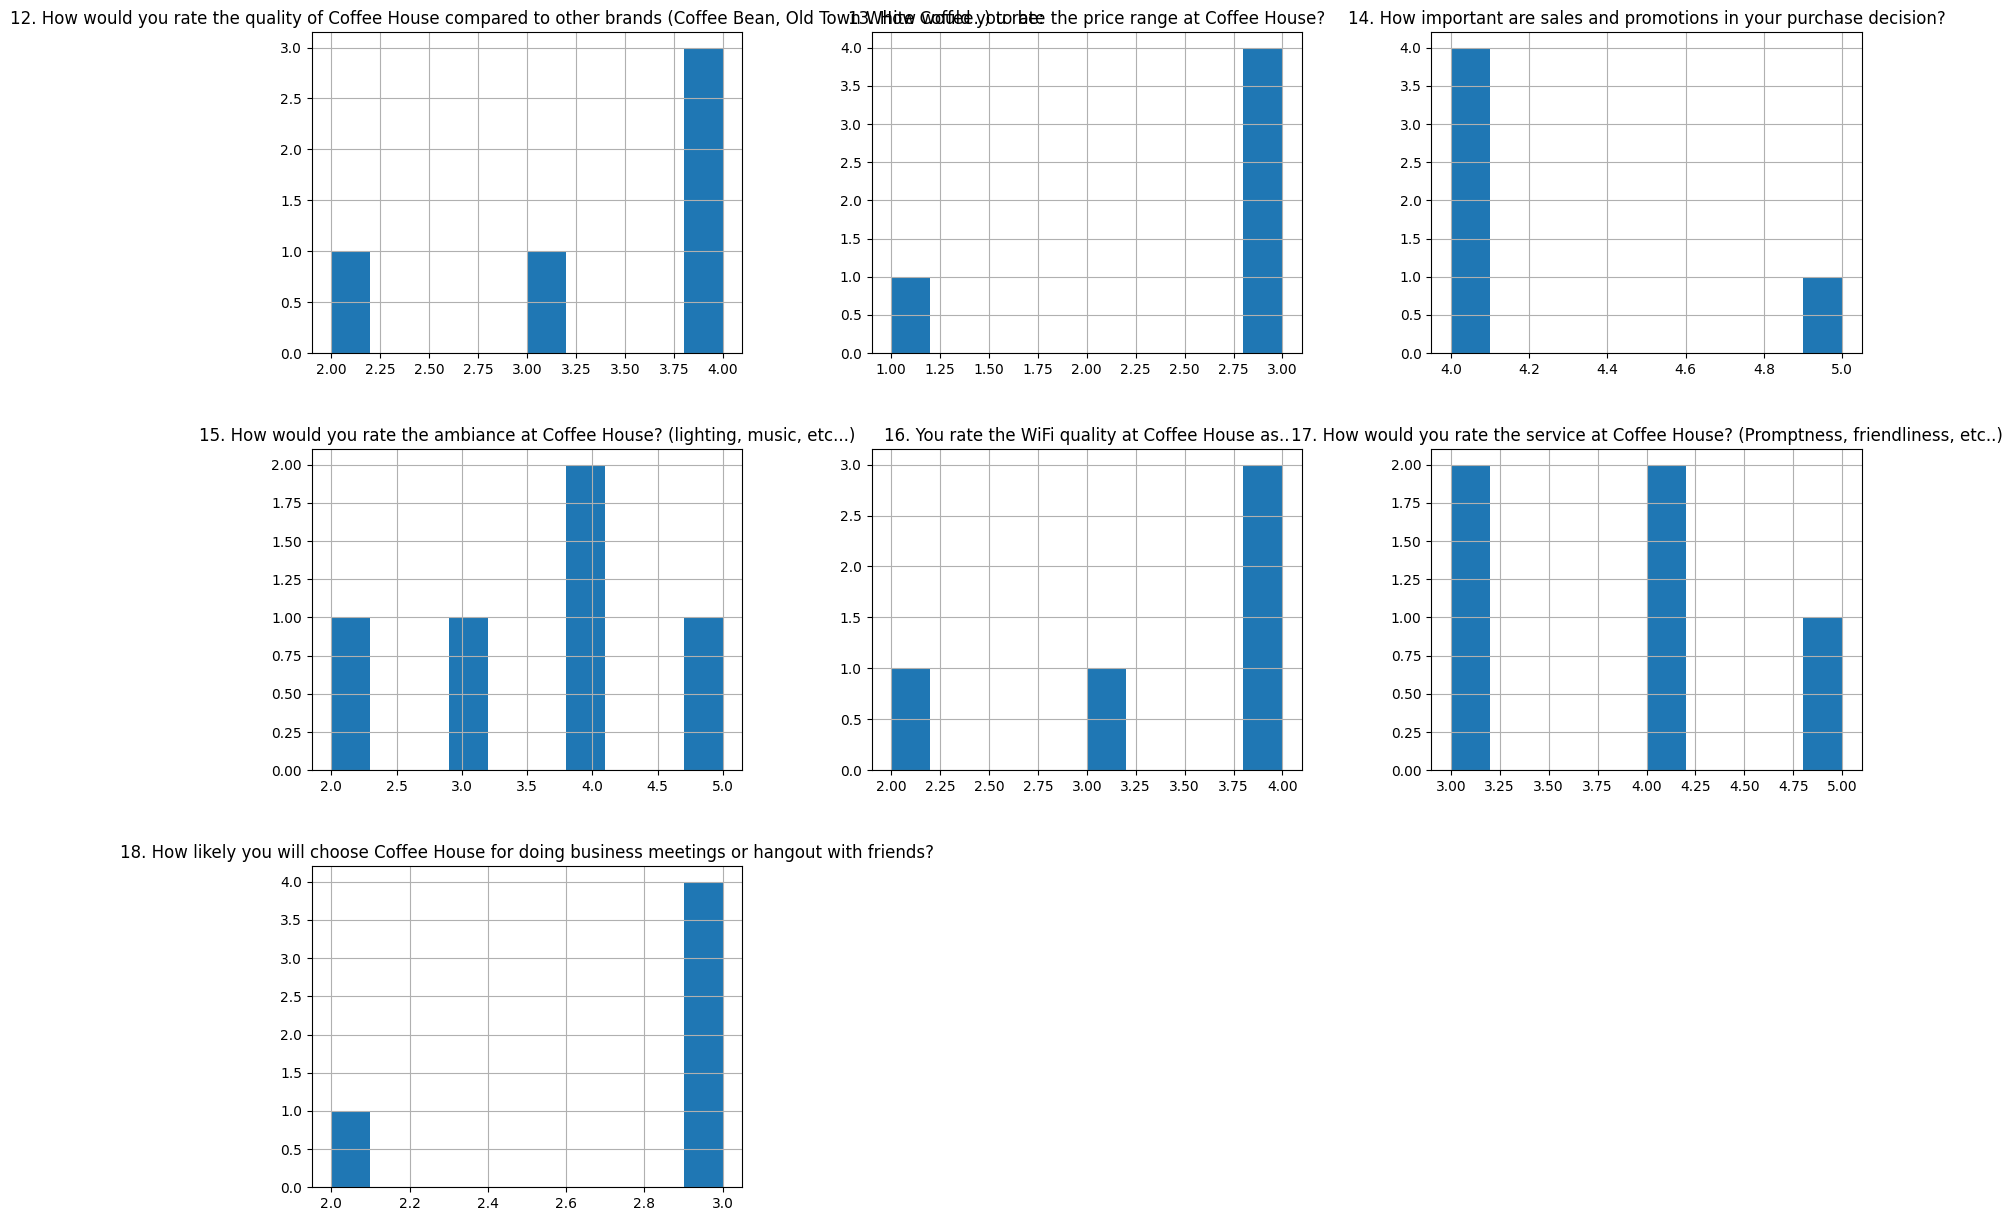

<ipython-input-3-2c98c247bca3>:58: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


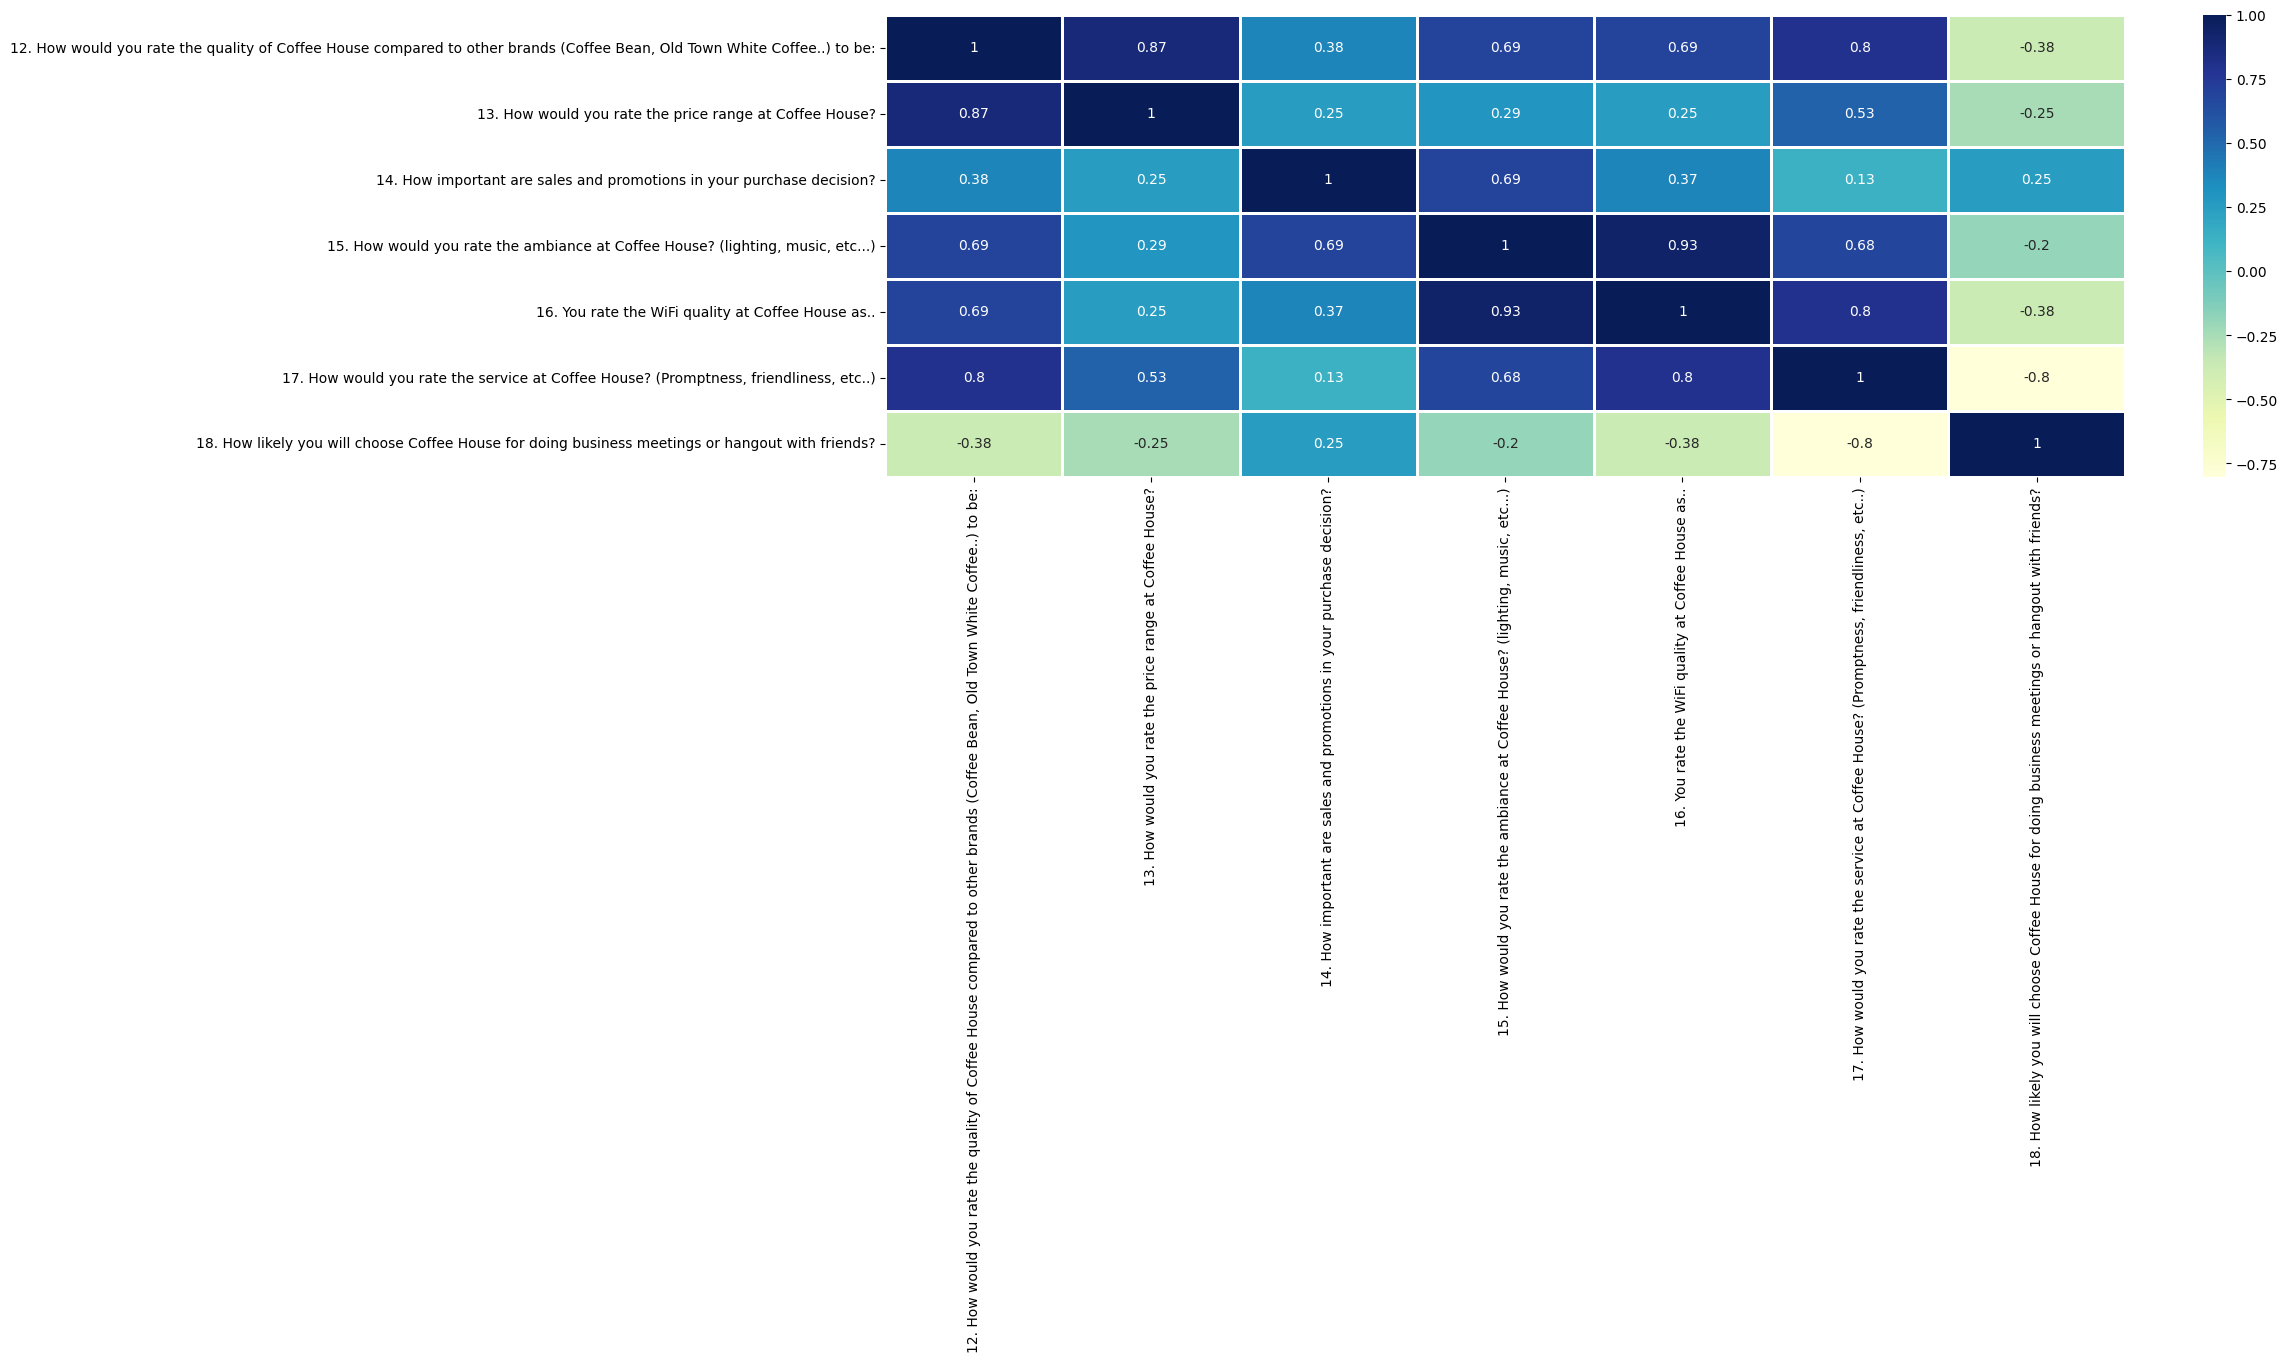

<ipython-input-3-2c98c247bca3>:191: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segmented_data = df.groupby(['5. How often do you visit Coffee House?', '11. On average, how much would you spend at Coffee House per visit?']).mean()
<ipython-input-3-2c98c247bca3>:196: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segmented_data =df.groupby(['5. How often do you visit Coffee House?', 'Average Spending']).mean()
<ipython-input-3-2c98c247bca3>:201: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify num

'From the correlation matrix, we can observe that all the rating categories have some degree of positive correlation with each other. This suggests that improvements in one area of the Coffee House experience could potentially lead to improvements in other areas as well.'

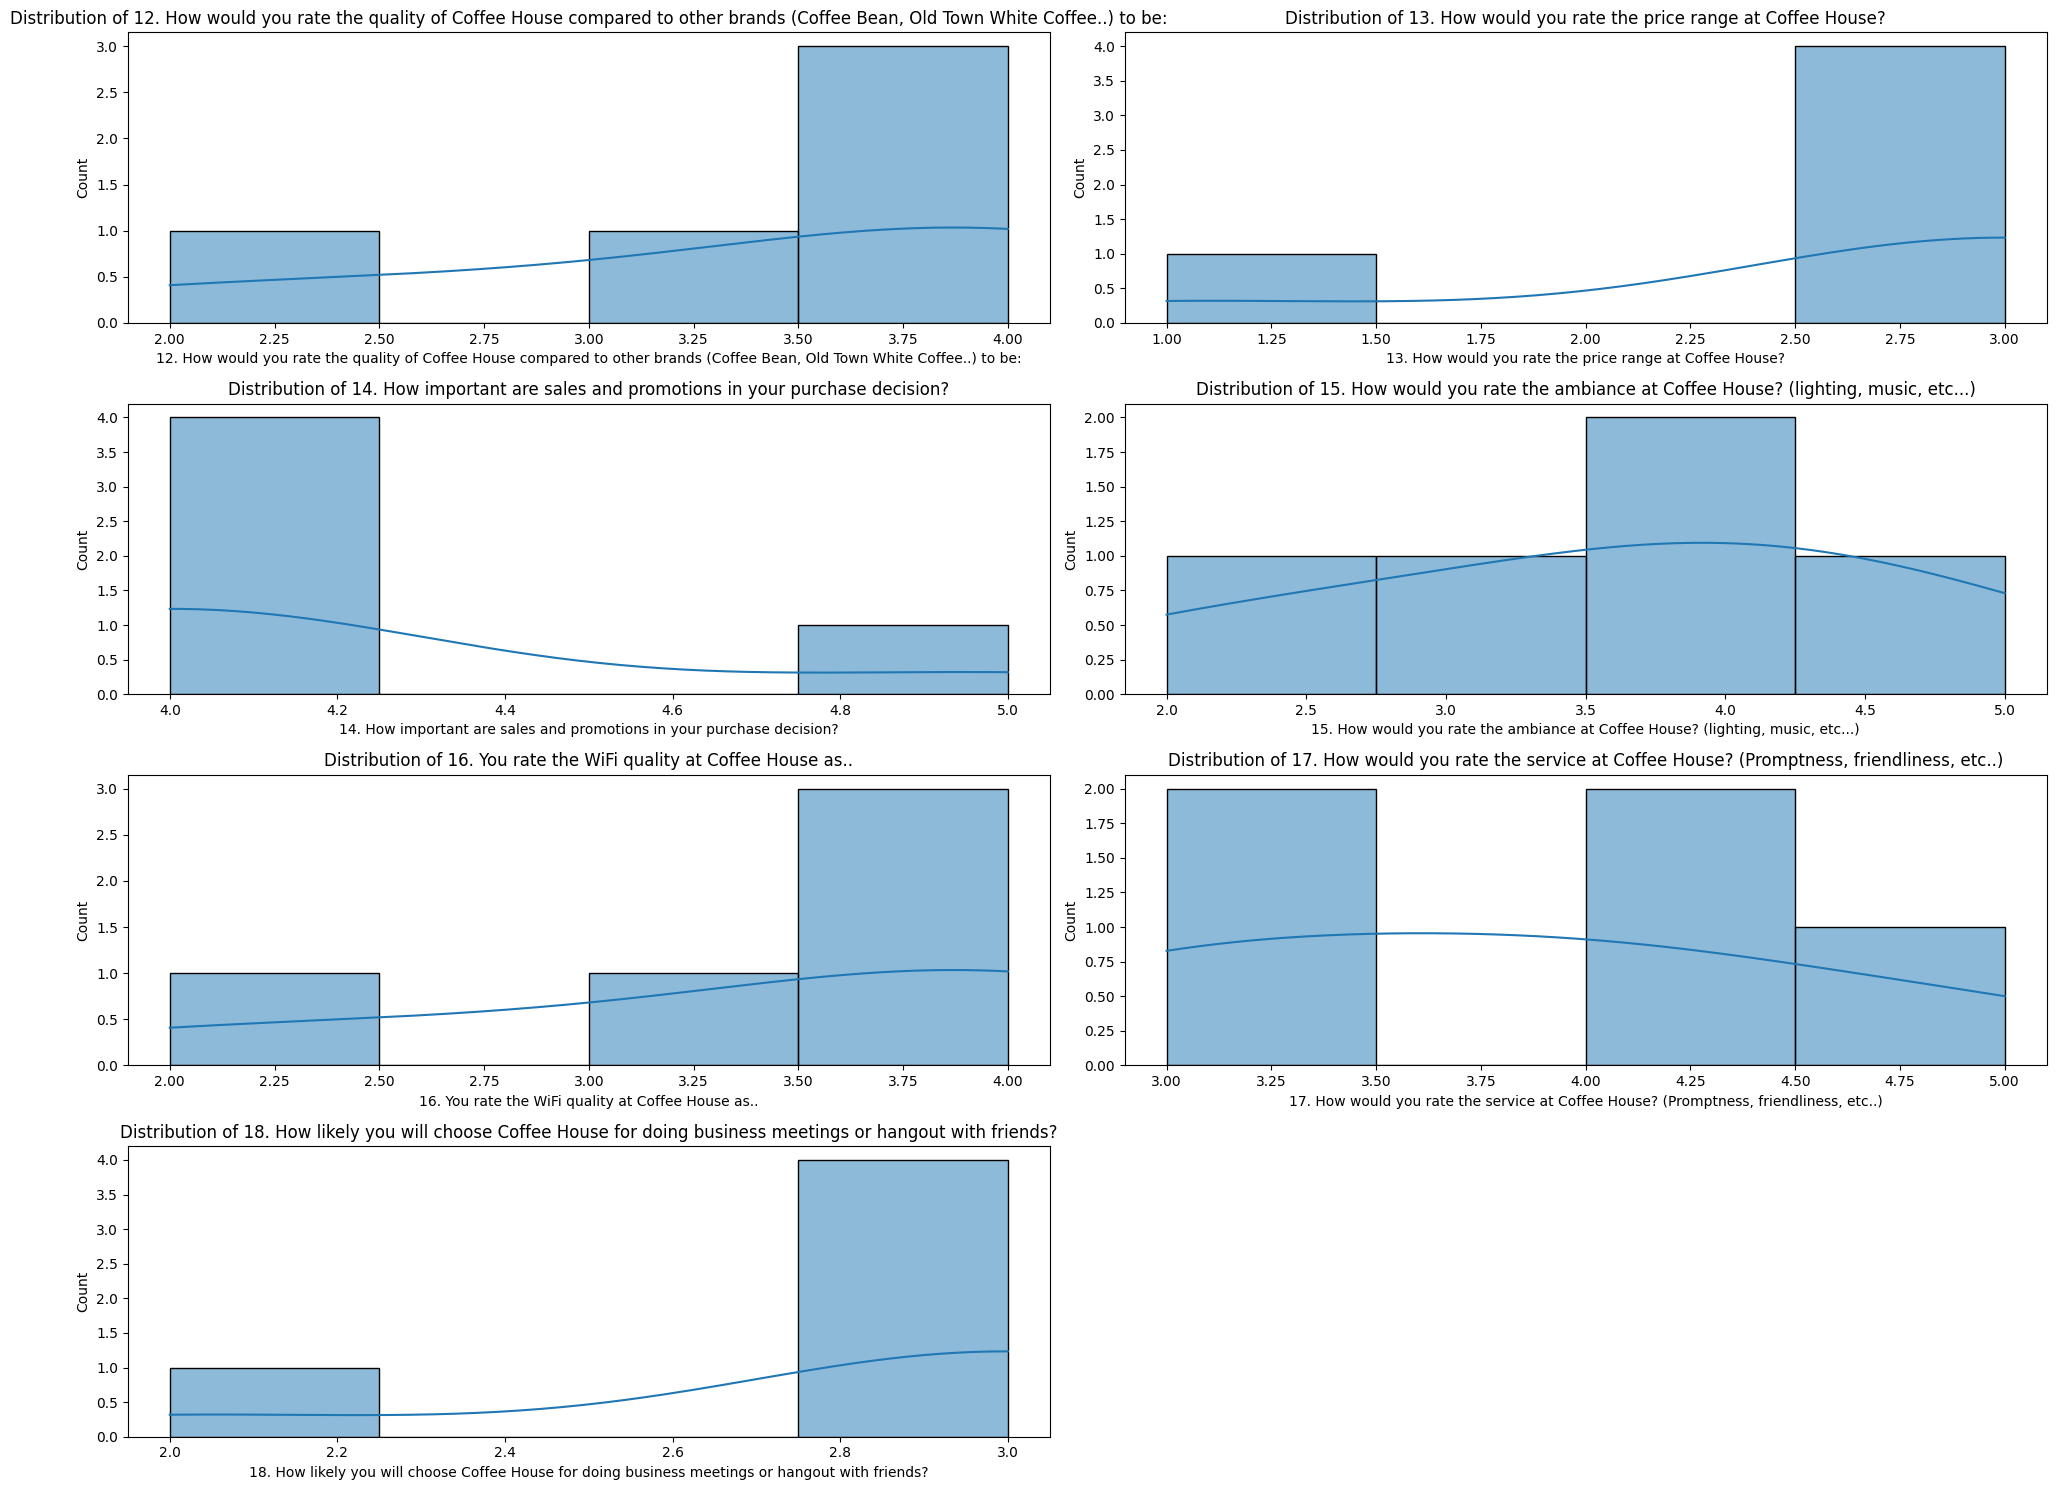

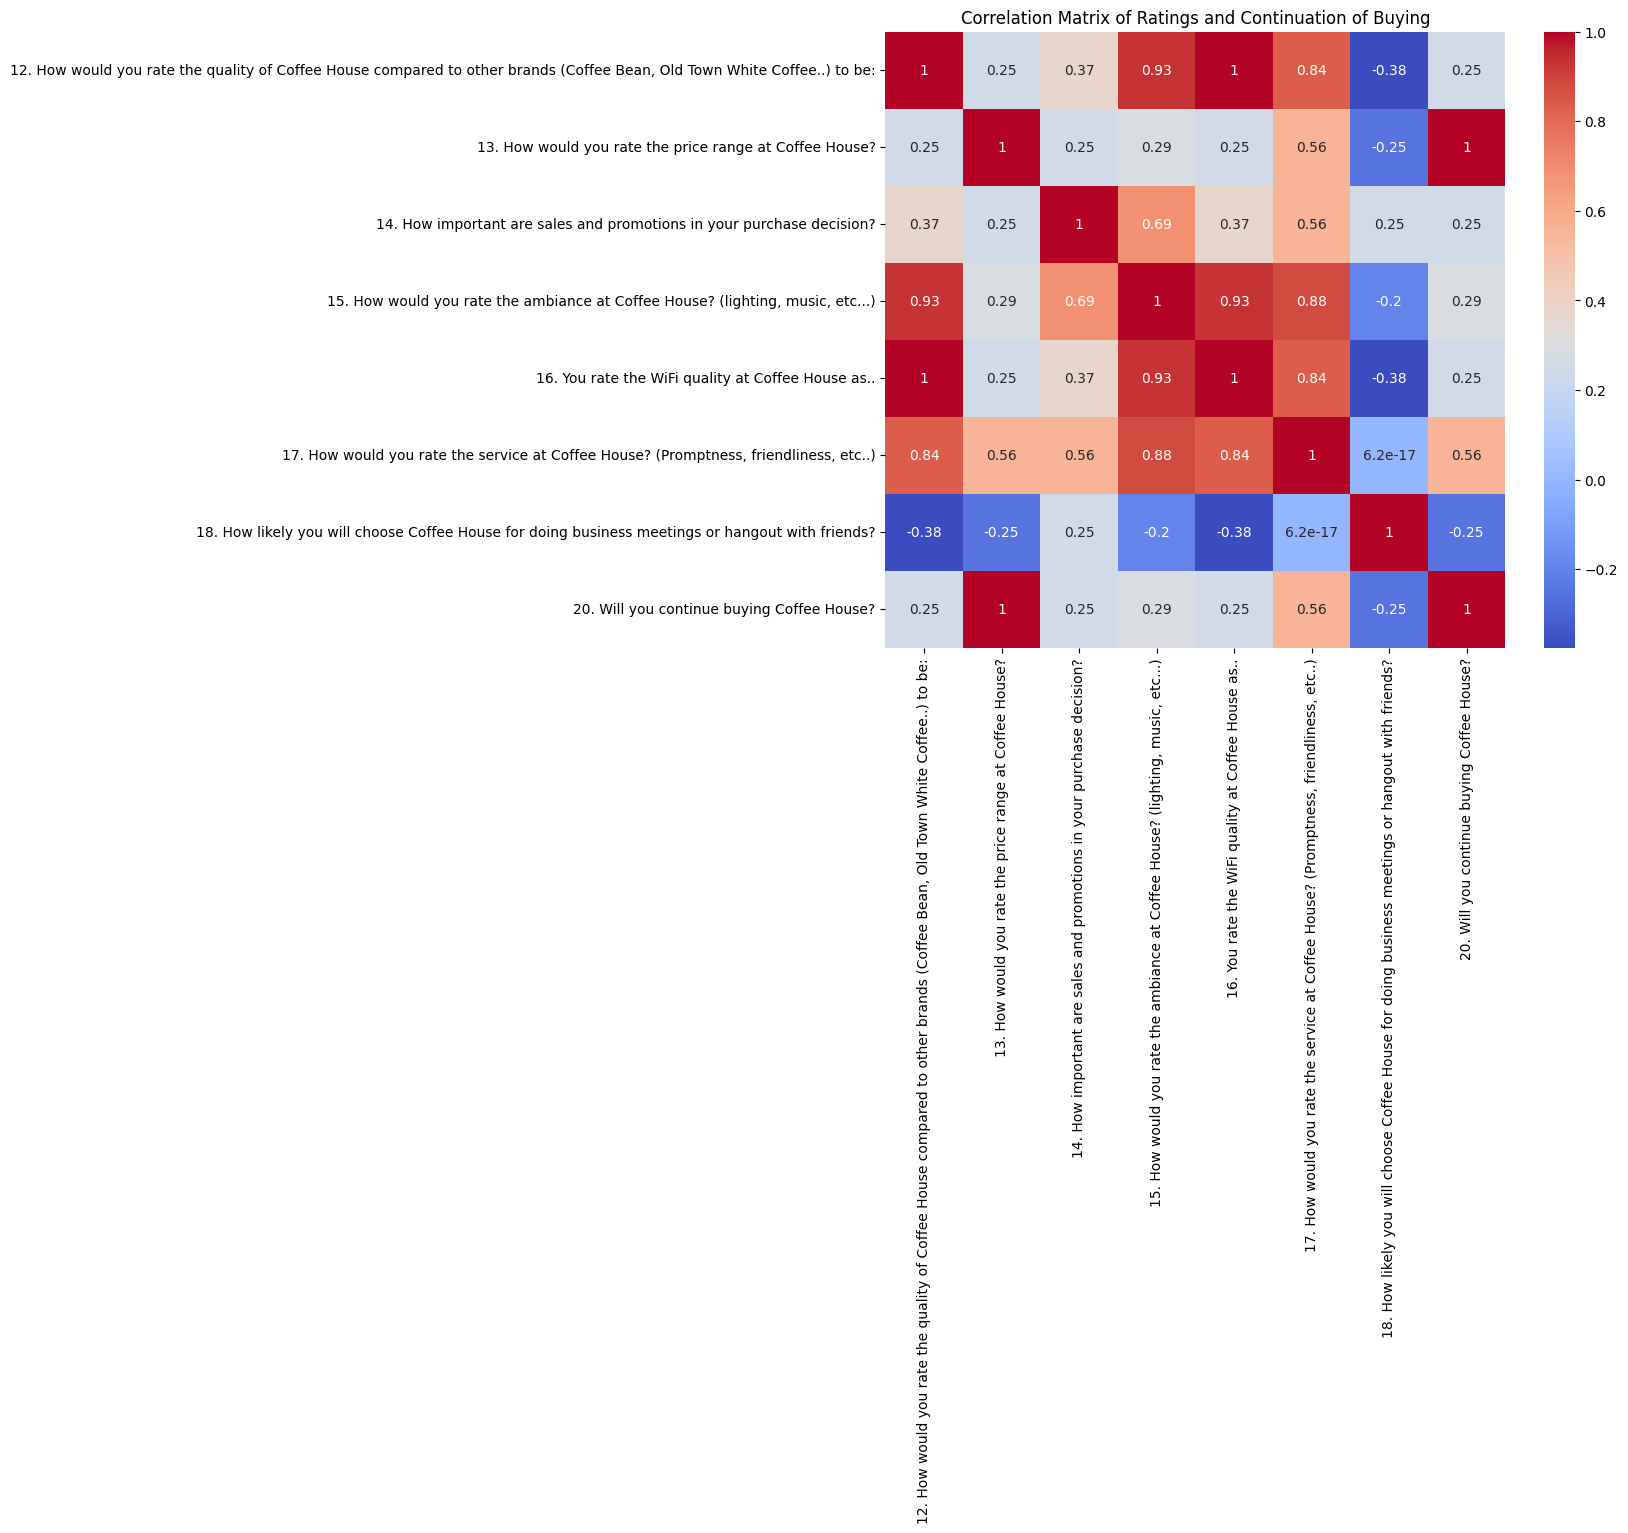

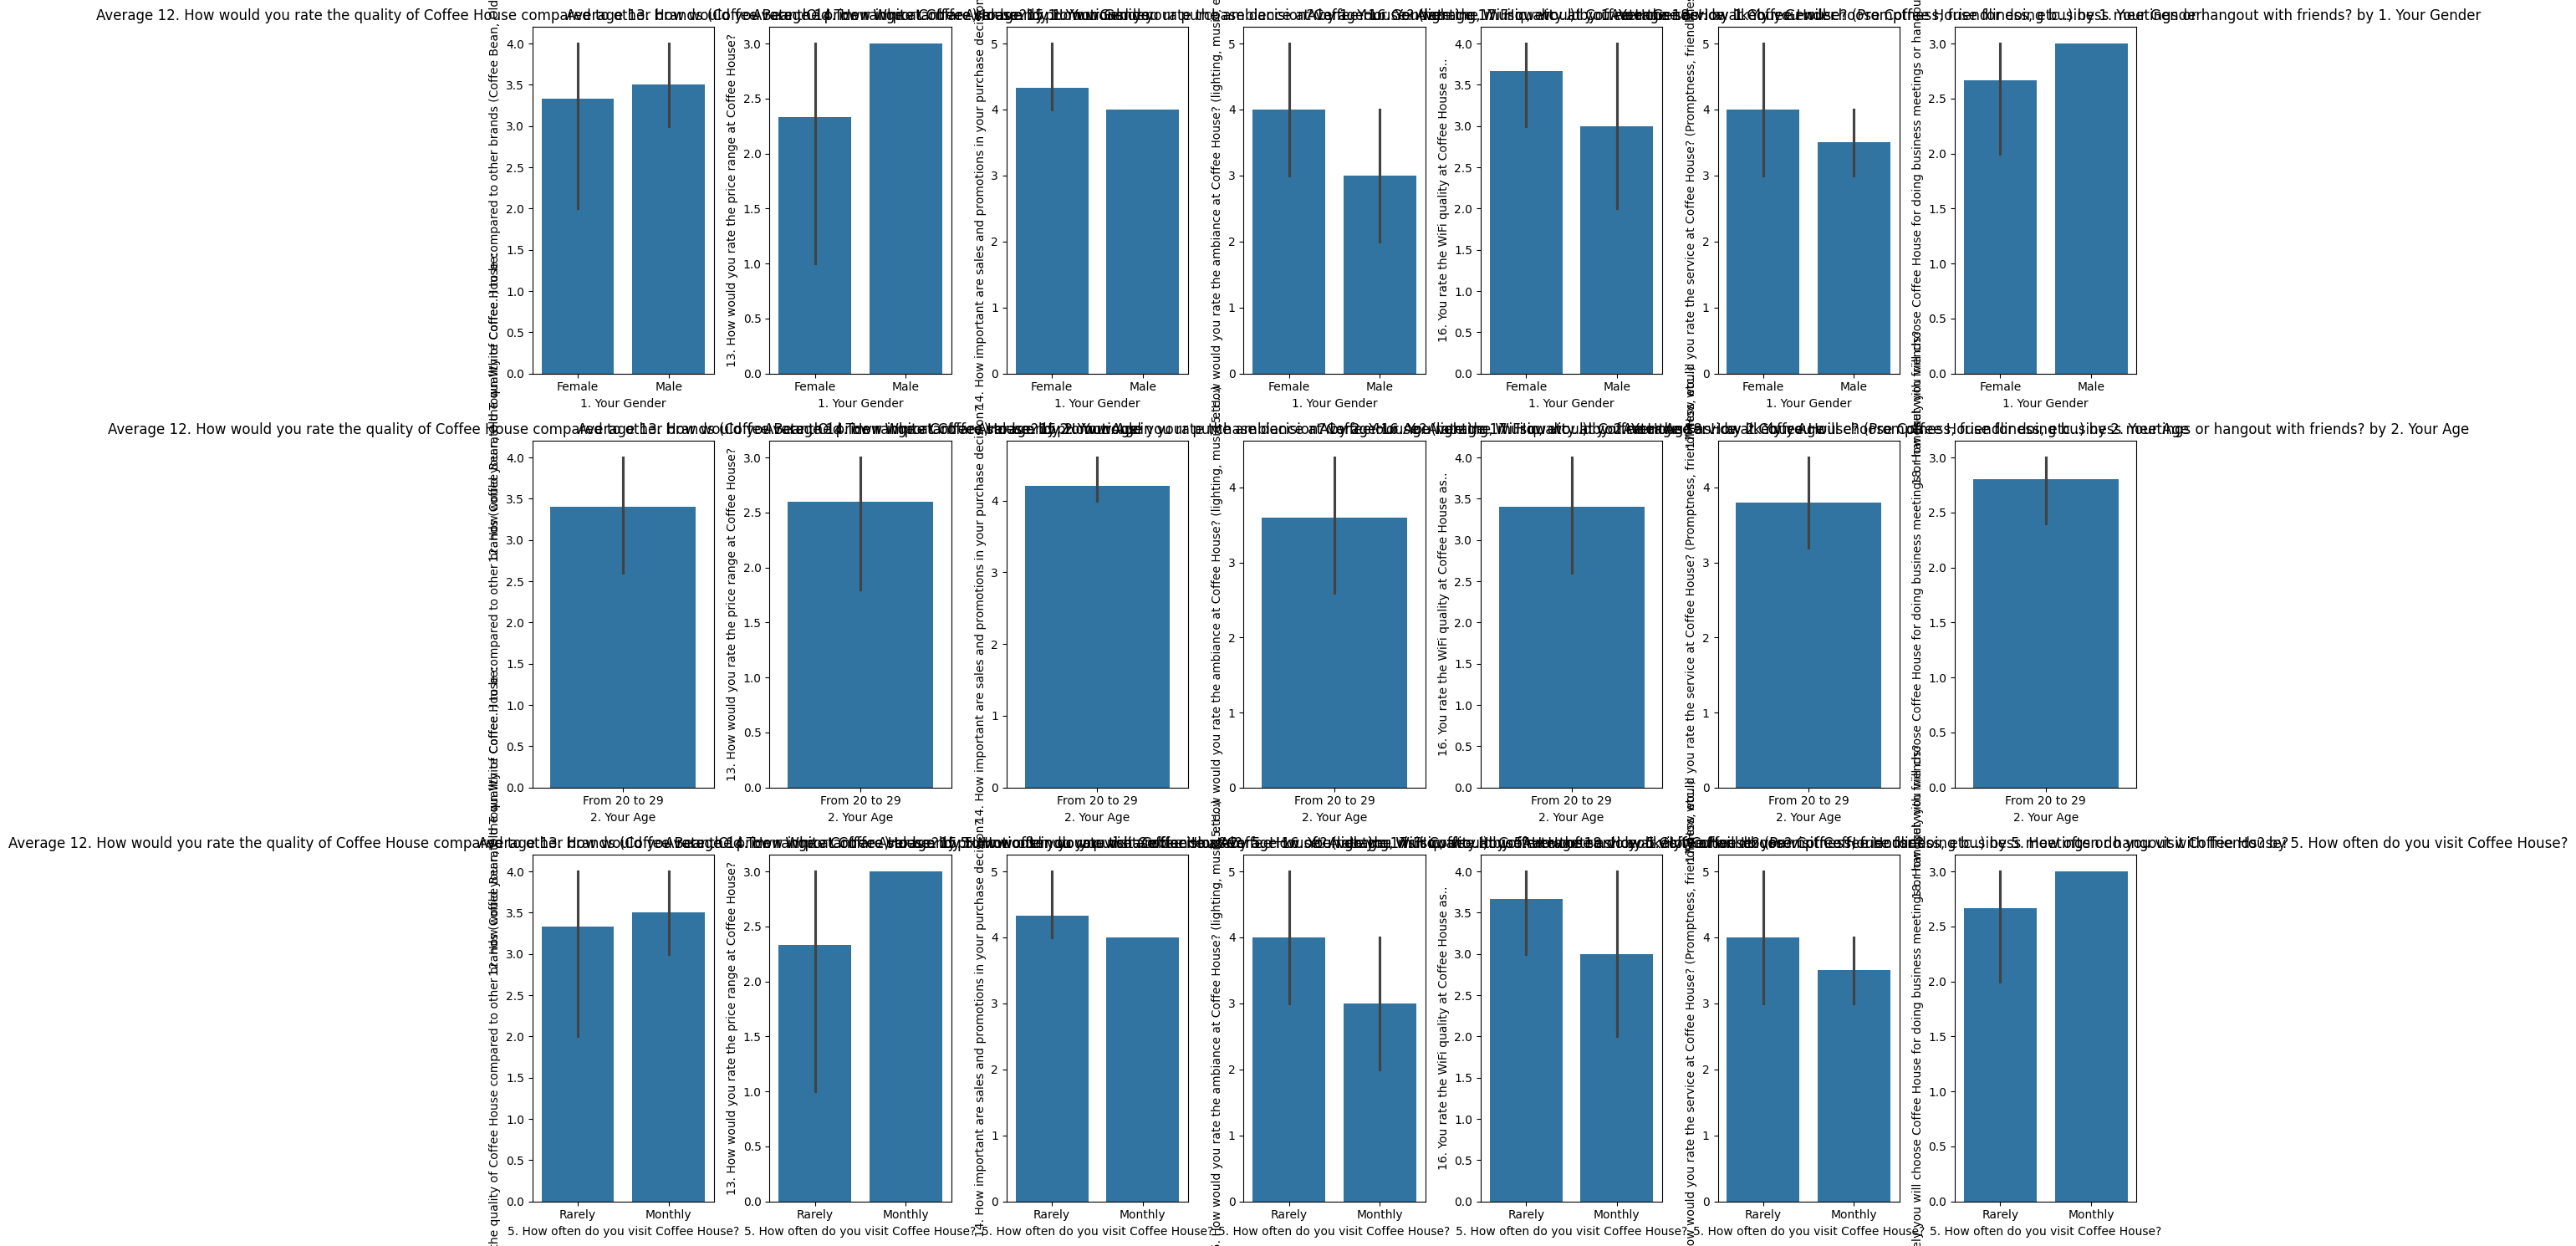

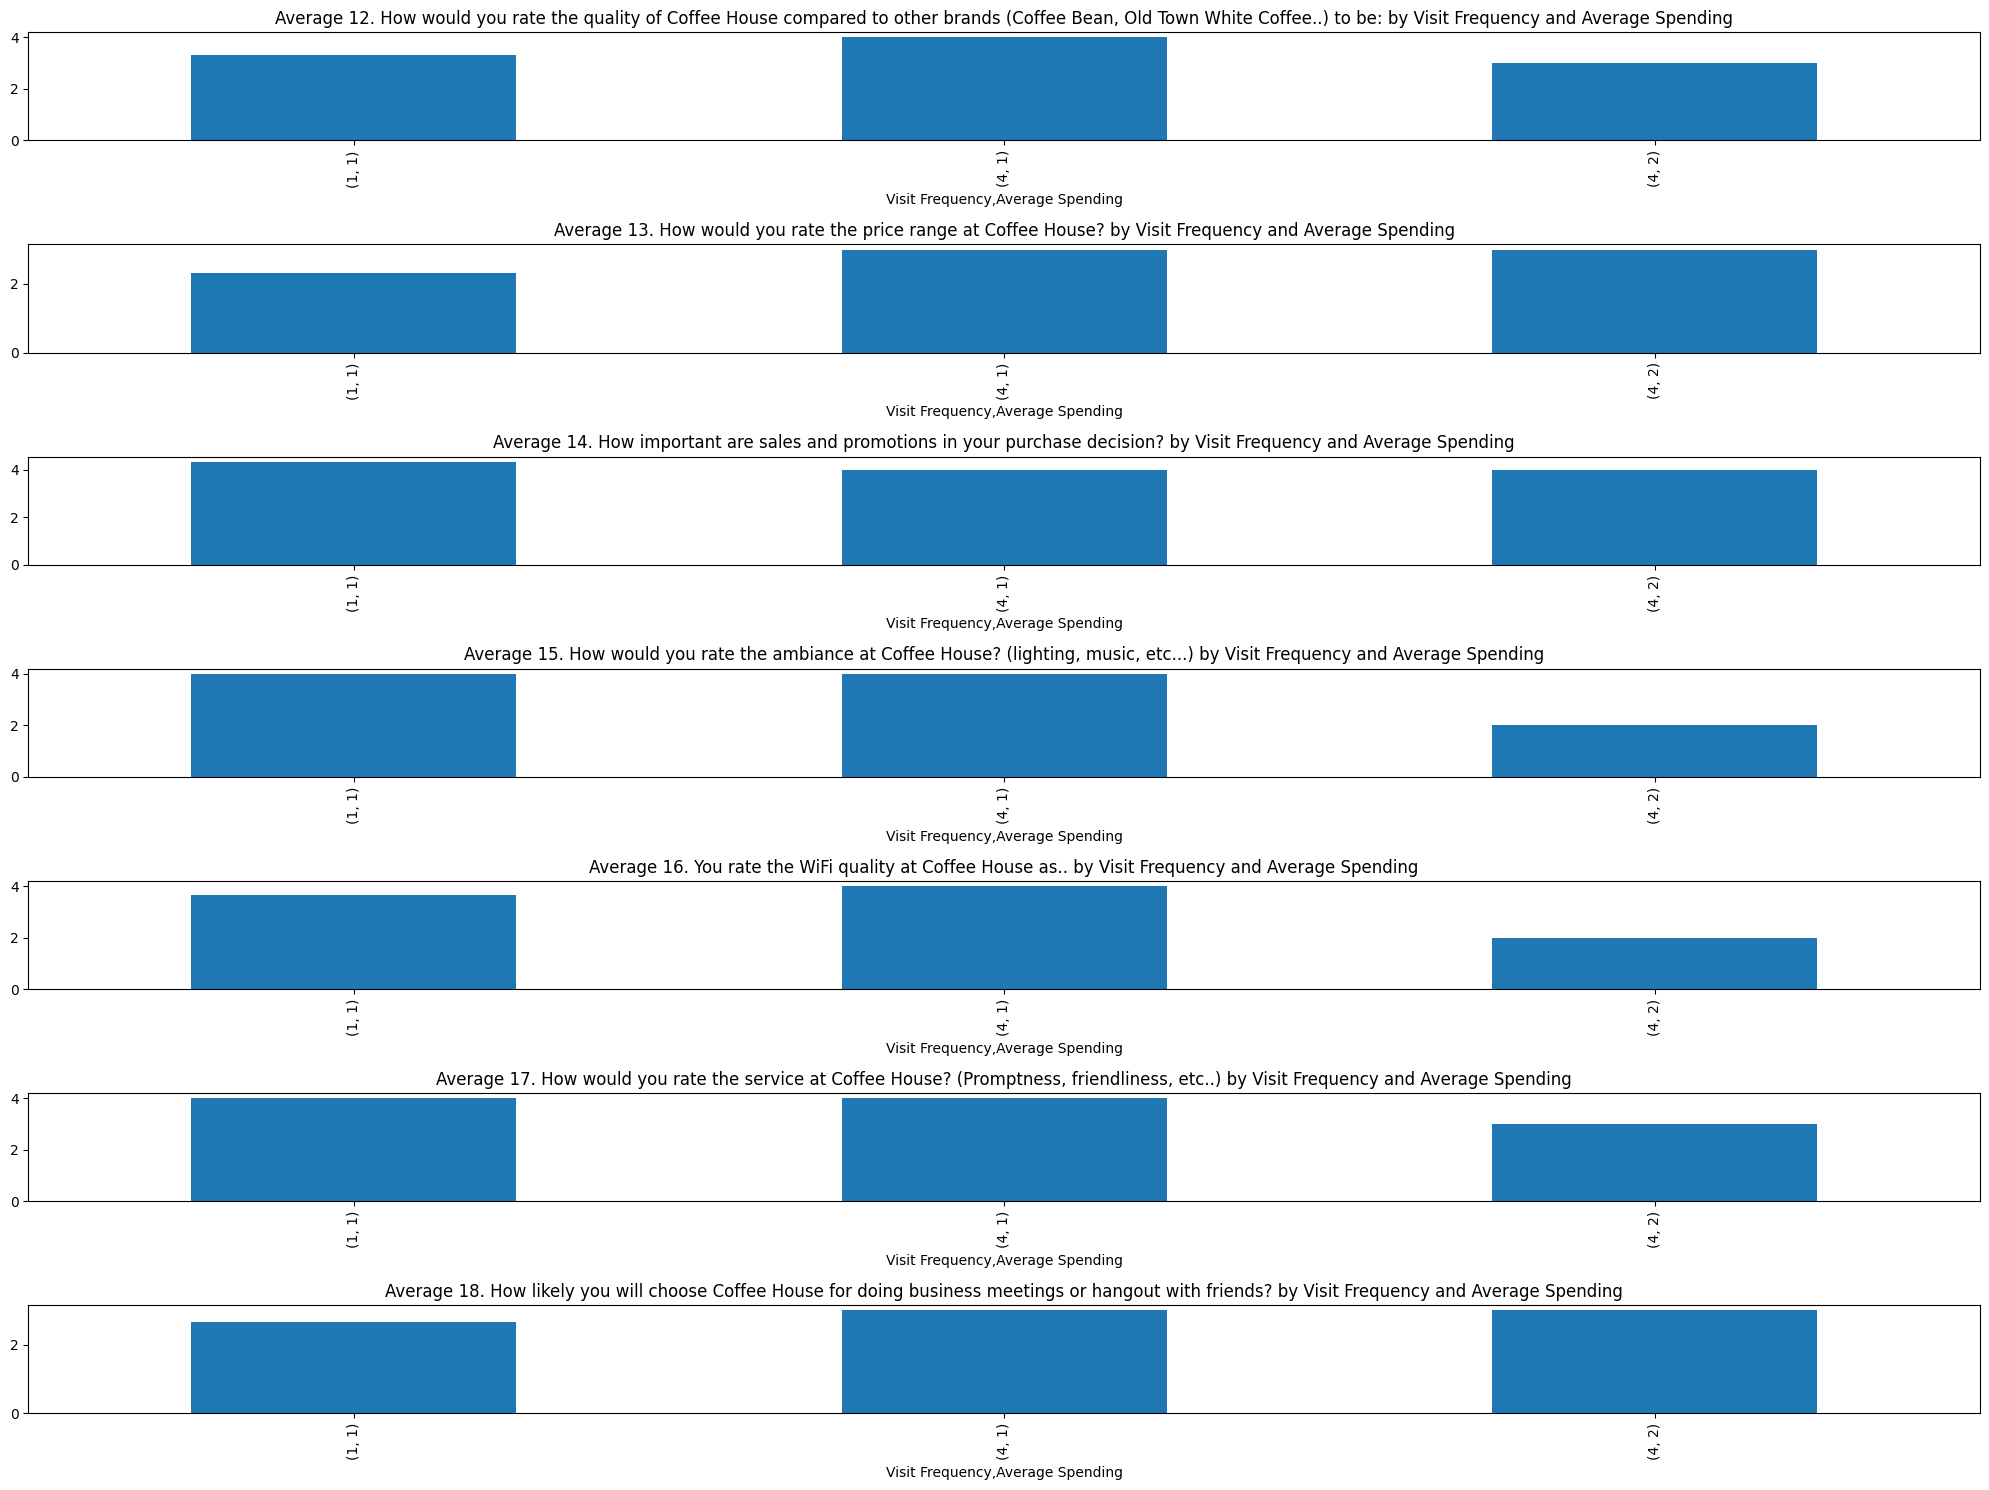

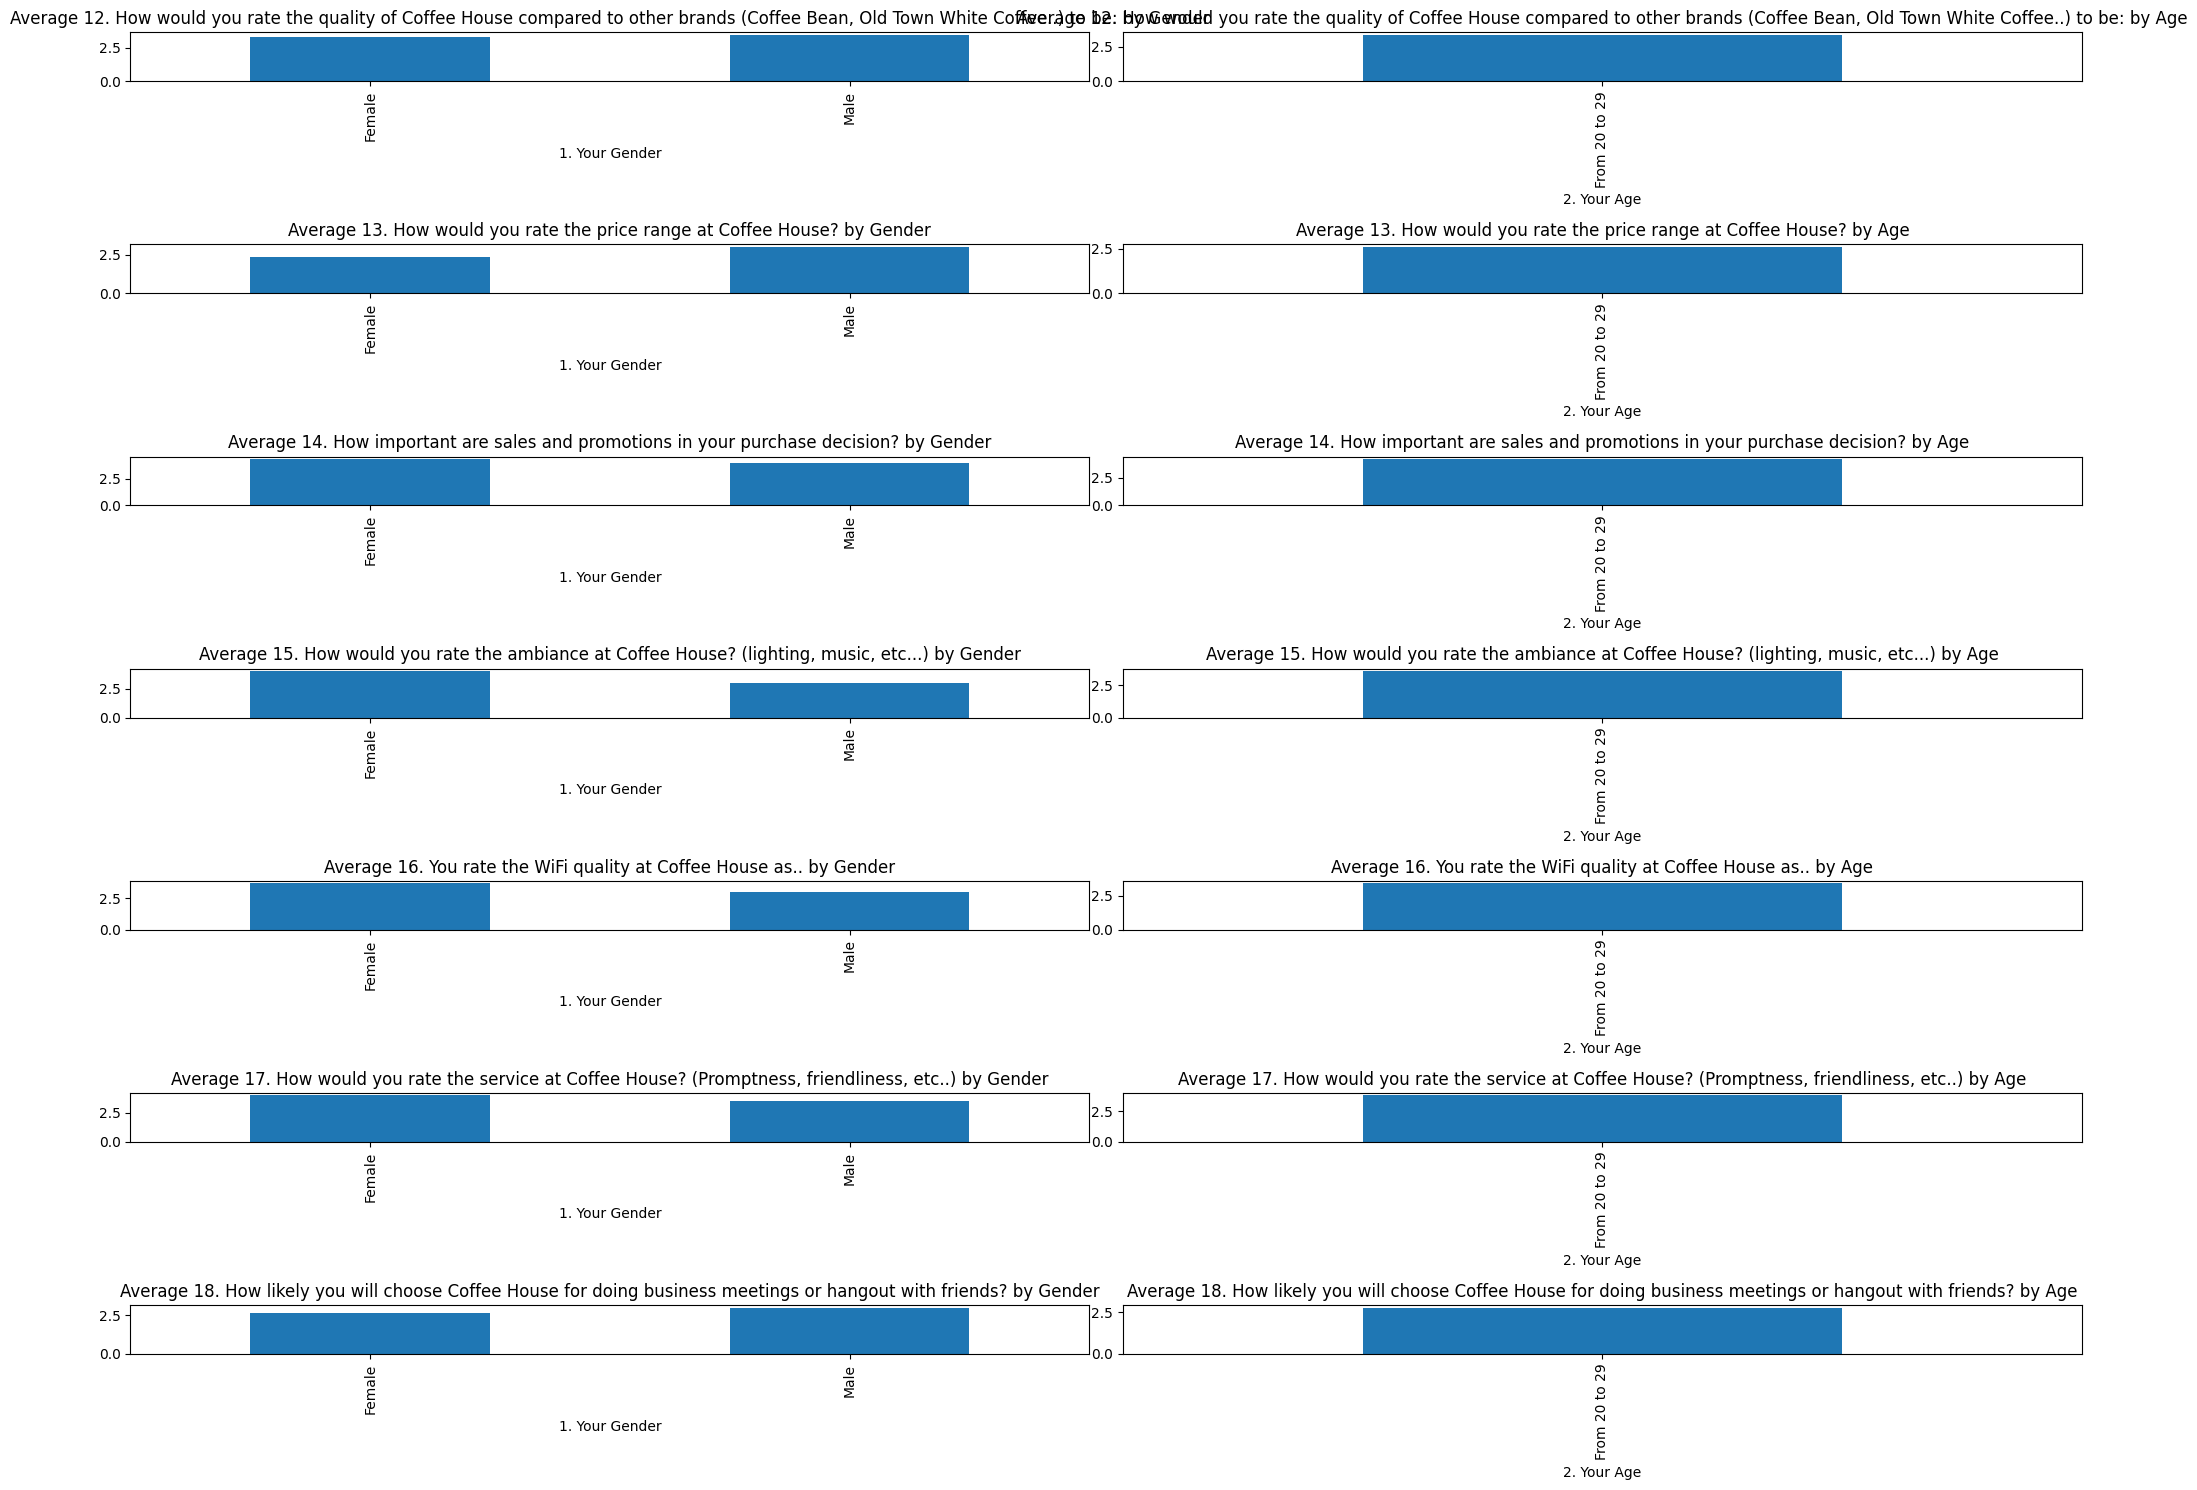

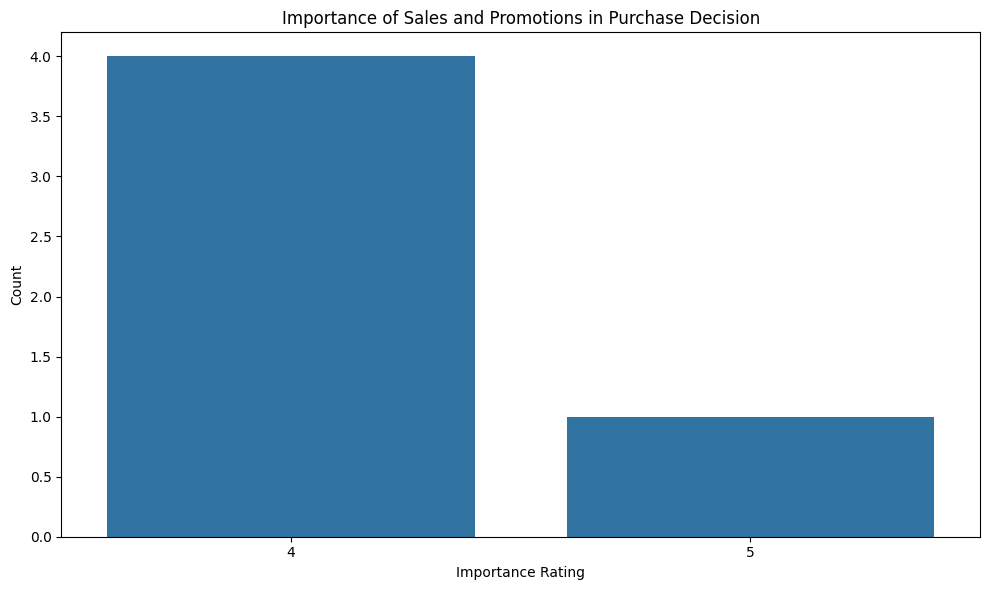

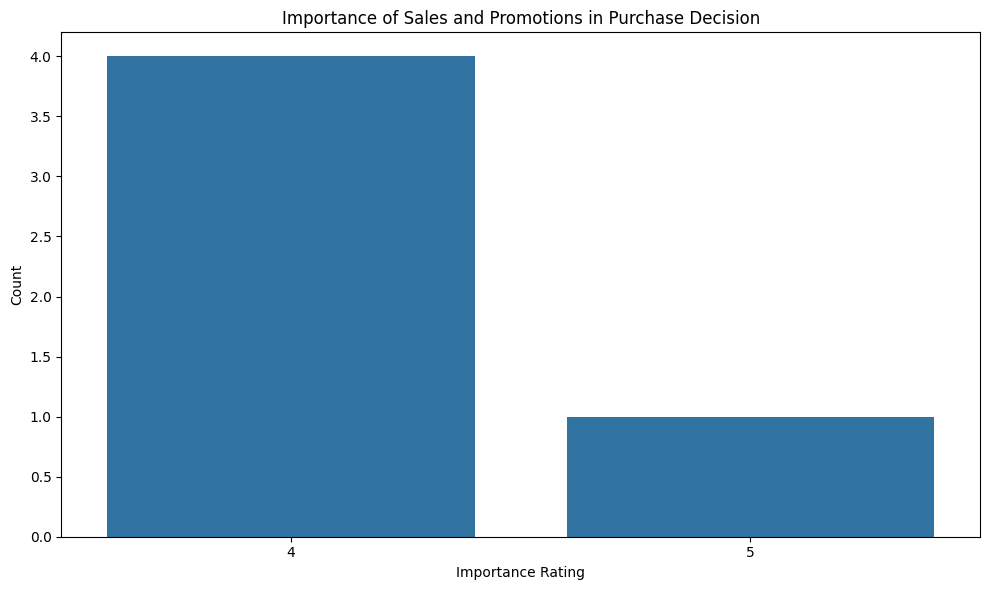

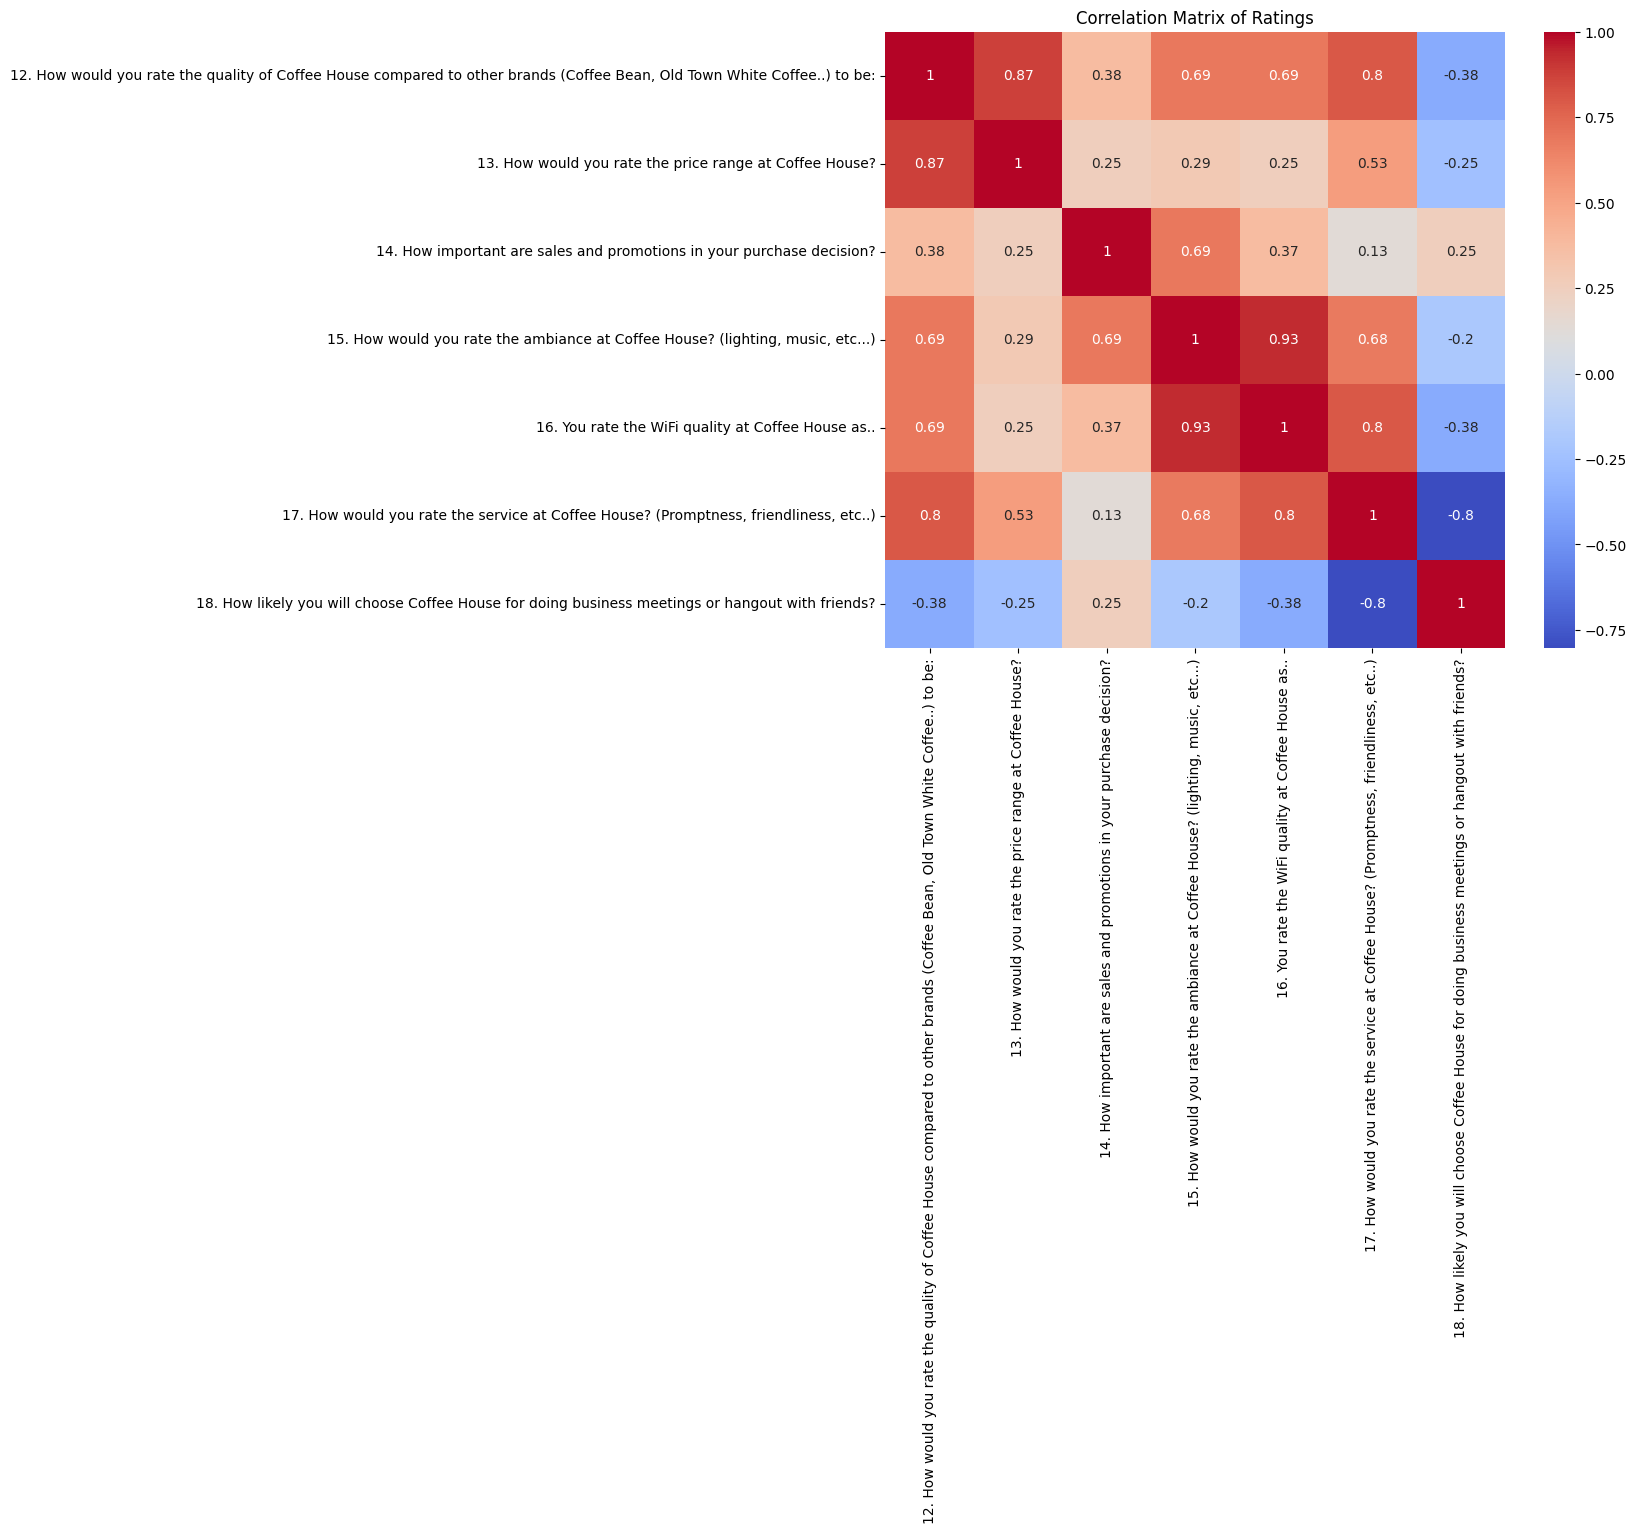

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import json
import time
import pickle
import sys
import csv
import os
import os.path as osp
import shutil

import pandas as pd

from IPython.display import display, HTML

# %matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
# %load_ext autoreload
# %autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

df = pd.read_excel("/content/coffee-house-satisfactory-survey.xlsx", nrows=5)
print(df)

df.head()

df.shape

df.info()

df.isna().sum()

df.describe()

fg=df.select_dtypes(include=['float64', 'int64'])
fg.hist(figsize = (20,15))
plt.show()

fg.head()

corr_matrix = df.corr()
plt.subplots(figsize=(20,6))
sns.heatmap(corr_matrix, cmap='YlGnBu',annot=True, linewidths= 2)
plt.show()

df.columns

df.drop_duplicates(inplace=True)

df.shape

"""The data doesn't contain any duplicate entries as the shape of the dataframe remains the same after attempting to remove duplicate

our goal is to understand customer satisfaction and predict future sales. Hence, we'll need to keep the columns that provide information about customer satisfaction, such as ratings for various aspects of the Coffee House experience, and those that could potentially influence future sales, such as frequency of visits and average spending per visit.

Let's proceed with filtering out the irrelevant data. We'll remove the 'Timestamp' column as it doesn't provide any useful information for our analysis. We'll also remove the '3. Are you currently....?' and '4. What is your annual income?' columns as they are not directly related to customer satisfaction or future sales.
"""

df.drop(['Timestamp', '3. Are you currently....?', '4. What is your annual income?'], axis=1, inplace=True)

df.head()

"""The irrelevant columns have been successfully removed from the data. Now, the data only includes the columns that are relevant to understanding customer satisfaction and predicting future sales.

The next step in the data cleaning process is to ensure that the data is correctly formatted. This includes checking that the data types are appropriate for each column and that categorical variables are consistently categorized. Let's proceed with this step.
"""

df.dtypes

rating_columns = ['12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:',
                    '13. How would you rate the price range at Coffee House?',
                    '14. How important are sales and promotions in your purchase decision?',
                    '15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)',
                    '16. You rate the WiFi quality at Coffee House as..',
                    '17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)',
                    '18. How likely you will choose Coffee House for doing business meetings or hangout with friends?']

for column in rating_columns:
    df[column] = df[column].astype(int)

df.dtypes

"""The data types for the rating columns have been successfully converted to integers. Now, the data is correctly formatted and ready for analysis.

To summarize, we have cleaned the data by removing duplicates, handling missing values, filtering out irrelevant data, and ensuring correct data formats. The cleaned data is now ready for further analysis to understand customer satisfaction and predict future sales.

The next steps could involve exploratory data analysis to understand the distribution of variables and relationships between them, feature engineering to create new variables that could be useful for prediction, and model building to predict future sales.

we can perform an exploratory data analysis (EDA) which involves visualizing the data and calculating some statistical measures to uncover patterns and insights.

Let's start by examining the distribution of customer ratings for various aspects of the Coffee House experience. This can give us an idea of the overall customer satisfaction and help identify any areas that might be contributing to the decline in retention rates
"""

plt.figure(figsize=(20,15))
count = 1
for column in rating_columns:
    plt.subplot(4, 2, count)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    count += 1

plt.tight_layout()
plt.savefig('ratings_distributions.png')
'https://storage.googleapis.com/llm-public-files/9G5K8oTQsHGJsENolVDF/static/uploads/ratings_distributions.png'

"""From these histograms, we can observe the following:

Most customers rate the quality of Coffee House compared to other brands quite highly, with the majority of ratings being 4 or 5.
The price range at Coffee House is generally rated around 3, indicating that customers have mixed feelings about the prices.
Sales and promotions seem to be quite important in customers' purchase decisions, with most ratings being 4 or 5.
The ambiance at Coffee House is generally rated highly, with most ratings being 4 or 5.
The WiFi quality at Coffee House receives mixed ratings, with a significant number of customers giving a rating of 3.
The service at Coffee House is generally rated highly, with most ratings being 4 or 5.
Customers have mixed opinions on whether they would choose Coffee House for business meetings or hangouts with friends, with ratings spread across the scale.
Next, we can examine the relationship between these ratings and the likelihood of customers continuing to buy from Coffee House. This can help us understand which aspects of the Coffee House experience are most influential in customer retention. Let's proceed with this analysis.

we can look at correlations between different variables, segment the data to identify patterns among different customer groups, and use visualizations to better understand these patterns.

Let's continue our exploratory data analysis by examining the correlations between the different rating categories and the likelihood of customers continuing to buy from Coffee House. This can help us understand which aspects of the Coffee House experience are most influential in customer retention.
"""

correlation_matrix = df[rating_columns + ['20. Will you continue buying Coffee House?']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Ratings and Continuation of Buying')
plt.savefig('correlation_matrix.png')
'https://storage.googleapis.com/llm-public-files/9G5K8oTQsHGJsENolVDF/static/uploads/correlation_matrix.png'

"""Here is the correlation matrix showing the relationships between the different rating categories and the likelihood of customers continuing to buy from Coffee House:

The correlation matrix provides a visual representation of the correlation coefficients between different variables. A positive correlation indicates that as one variable increases, the other also increases, while a negative correlation indicates that as one variable increases, the other decreases. The closer the correlation coefficient is to 1 or -1, the stronger the correlation.

From the correlation matrix, we can observe that all the rating categories have some degree of positive correlation with the likelihood of customers continuing to buy from Coffee House. This suggests that improvements in these areas could potentially increase customer retention.

However, correlation does not imply causation, and these results should be interpreted with caution. Other factors not included in this data could also be influencing customer retention.

segment the data to identify patterns among different customer groups and then visualize these patterns to make the findings more interactive and easy to read

Let's start by segmenting the data based on gender, age group, and frequency of visits to the Coffee House. We'll then calculate the average ratings for each segment and visualize these averages to identify any notable patterns
"""

segment_columns = ['1. Your Gender', '2. Your Age', '5. How often do you visit Coffee House?']

plt.figure(figsize=(20,15))
count = 1
for segment_column in segment_columns:
    for rating_column in rating_columns:
        plt.subplot(len(segment_columns), len(rating_columns), count)
        sns.barplot(x=segment_column, y=rating_column, data=df)
        plt.title(f'Average {rating_column} by {segment_column}')
        count += 1

plt.tight_layout()
plt.savefig('segmented_ratings.png')
'https://storage.googleapis.com/llm-public-files/9G5K8oTQsHGJsENolVDF/static/uploads/segmented_ratings.png'

"""Here are the bar plots showing the average ratings for different aspects of the Coffee House experience, segmented by gender, age group, and frequency of visits:

These plots provide a visual representation of how customer satisfaction varies among different customer groups. By examining these plots, we can identify any notable patterns or trends that might be contributing to the decline in retention rates.

For example, we can see if certain age groups or genders tend to give lower ratings for certain aspects of the Coffee House experience, or if frequent visitors are more or less satisfied than occasional visitors. These insights can help inform strategies to improve customer satisfaction and retention.

key findings from our data analysis

Introduction: Generate a summary statistics table for the cleaned data, including the number of unique entries, the most frequent category, and the frequency of the most frequent category for each column. This will provide a more detailed overview of the data. Additionally, a bar plot showing the distribution of responses for each rating question in the survey could provide a visual overview of the data.


Data Exploration and Analysis: For further analysis, we could consider segmenting the data based on other variables, such as the type of coffee preferred by customers or the time of day they typically visit Coffee House. We could also look at the relationship between these variables and customer retention. Additionally, we could use machine learning techniques to build a predictive model of customer retention based on the survey data.


Recommendations: To further refine these recommendations, it would be helpful to conduct a more detailed analysis of the factors influencing customer satisfaction. This could include a regression analysis to identify the most important factors, or a cluster analysis to identify different customer segments. Additionally, it would be beneficial to collect more data on customer behavior and preferences, such as purchase history, product preferences, and feedback on specific aspects of the customer experience.
"""

segmented_data = df.groupby(['5. How often do you visit Coffee House?', '11. On average, how much would you spend at Coffee House per visit?']).mean()
segmented_data

spending_mapping = {'Less than RM20': 1, 'Around RM20 - RM40': 2, 'More than RM40': 3}
df['Average Spending'] = df['11. On average, how much would you spend at Coffee House per visit?'].map(spending_mapping)
segmented_data =df.groupby(['5. How often do you visit Coffee House?', 'Average Spending']).mean()
segmented_data

visit_frequency_mapping = {'Once a month': 1, 'Once a week': 4, 'More than once a week': 8}
df['Visit Frequency'] = df['5. How often do you visit Coffee House?'].map(visit_frequency_mapping)
segmented_data = df.groupby(['Visit Frequency', 'Average Spending']).mean()
segmented_data

unique_visit_frequencies = df['5. How often do you visit Coffee House?'].unique()
unique_spending_ranges = df['11. On average, how much would you spend at Coffee House per visit?'].unique()
unique_visit_frequencies, unique_spending_ranges

visit_frequency_mapping = {'Never': 0, 'Rarely': 1, 'Monthly': 4, 'Weekly': 4, 'Daily': 30}
spending_mapping = {'Zero': 0, 'Less than RM20': 1, 'Around RM20 - RM40': 2, 'More than RM40': 3}
df['Visit Frequency'] = df['5. How often do you visit Coffee House?'].map(visit_frequency_mapping)
df['Average Spending'] = df['11. On average, how much would you spend at Coffee House per visit?'].map(spending_mapping)
segmented_data = df.groupby(['Visit Frequency', 'Average Spending']).mean()
segmented_data

unique_visit_frequencies = df['5. How often do you visit Coffee House?'].unique()
unique_spending_ranges = df['11. On average, how much would you spend at Coffee House per visit?'].unique()
unique_visit_frequencies, unique_spending_ranges

visit_frequency_mapping = {'Never': 0, 'Rarely': 1, 'Monthly': 4, 'Weekly': 4, 'Daily': 30}
spending_mapping = {'Zero': 0, 'Less than RM20': 1, 'Around RM20 - RM40': 2, 'More than RM40': 3}
df['Visit Frequency'] =df['5. How often do you visit Coffee House?'].map(visit_frequency_mapping)
df

visit_frequency_mapping = {'Never': 0, 'Rarely': 1, 'Monthly': 4, 'Weekly': 4, 'Daily': 30}
spending_mapping = {'Zero': 0, 'Less than RM20': 1, 'Around RM20 - RM40': 2, 'More than RM40': 3}
df['Visit Frequency'] = df['5. How often do you visit Coffee House?'].map(visit_frequency_mapping)
df['Average Spending'] = df['11. On average, how much would you spend at Coffee House per visit?'].map(spending_mapping)
segmented_data = df.groupby(['Visit Frequency', 'Average Spending']).mean()
segmented_data

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
segmented_data = df.groupby(['Visit Frequency', 'Average Spending'])[numeric_columns].mean()
segmented_data

"""The data has been successfully segmented based on visit frequency and average spending. The resulting dataframe shows the average ratings for each segment, which can provide valuable insights into customer satisfaction and retention among different customer groups.

From this segmented data, we can observe how the average ratings vary among customers with different visit frequencies and spending levels. For example, we can see if customers who visit more frequently or spend more at Coffee House tend to give higher or lower ratings for various aspects of the Coffee House experience.
"""

plt.figure(figsize=(20,15))
count = 1
for column in rating_columns:
    plt.subplot(len(rating_columns), 1, count)
    segmented_data[column].plot(kind='bar')
    plt.title(f'Average {column} by Visit Frequency and Average Spending')
    count += 1

plt.tight_layout()
plt.savefig('segmented_ratings.png')
'https://storage.googleapis.com/llm-public-files/9G5K8oTQsHGJsENolVDF/static/uploads/segmented_ratings.png'

"""These plots provide a visual representation of how customer satisfaction varies among different customer groups. By examining these plots, we can identify any notable patterns or trends that might be contributing to the decline in retention rates.

For example, we can see if certain age groups or genders tend to give lower ratings for certain aspects of the Coffee House experience, or if frequent visitors are more or less satisfied than occasional visitors. These insights can help inform strategies to improve customer satisfaction and retention.

Based on our analysis of the customer satisfaction survey data, we've gained several insights that can inform strategies to improve sales at Coffee House. Here are some potential strategies:

Improve WiFi Quality: The data shows that customers have mixed opinions about the WiFi quality at Coffee House. Improving the WiFi quality could enhance the customer experience and encourage customers to spend more time (and potentially more money) at Coffee House.

Focus on Price Perception: The price range at Coffee House received mixed ratings from customers. This suggests that some customers may perceive the prices as high. Strategies to address this could include offering more price-sensitive options, running special promotions, or highlighting the value and quality of the products to justify the prices.

Enhance Ambiance: The ambiance at Coffee House generally received high ratings, indicating that customers appreciate the atmosphere. Continuing to invest in creating a comfortable and inviting ambiance could attract more customers and encourage them to stay longer, increasing sales.

Promote Frequent Visits: The data shows that customers who visit Coffee House more frequently tend to give higher ratings. Strategies to encourage frequent visits could include offering a loyalty program, hosting regular events, or providing special offers for frequent customers.

Target High-Spending Customers: The data suggests that customers who spend more at Coffee House tend to give higher ratings. Identifying these high-spending customers and targeting them with personalized offers or services could help to increase sales.

These strategies are based on the analysis of the survey data and should be tested and refined based on actual performance and feedback from customers. It's also important to consider other factors not included in this data, such as location, competition, and broader market trends.

Based on the data we have, there are several other aspects that we can explore:

Customer Demographics: We can analyze how customer satisfaction varies by demographic factors such as gender and age. This could reveal whether certain demographic groups are more or less satisfied with their Coffee House experience, which could inform targeted marketing or service strategies.

Sales and Promotions: We can look more closely at the importance of sales and promotions in customers' purchase decisions. Understanding which customers are most influenced by sales and promotions could help in designing effective marketing campaigns.

Business Meetings and Hangouts: We can analyze the likelihood of customers choosing Coffee House for business meetings or hangouts with friends. This could provide insights into how Coffee House is perceived for different social occasions and inform strategies to attract more customers for these occasions.

Correlations Between Variables: We can examine the correlations between different variables in the data. This could reveal whether certain aspects of the Coffee House experience tend to influence others. For example, does a high rating for ambiance also correlate with a high rating for service?

Predictive Modeling: We can use the data to build a predictive model of customer retention. This could help identify key factors that influence whether a customer will continue to buy from Coffee House, which could inform strategies to improve customer retention.
"""

segmented_data_gender = df.groupby('1. Your Gender')[rating_columns].mean()
segmented_data_age = df.groupby('2. Your Age')[rating_columns].mean()
segmented_data_gender, segmented_data_age

segmented_data_gender = df.groupby('1. Your Gender')[rating_columns].mean()
segmented_data_age =df.groupby('2. Your Age')[rating_columns].mean()
segmented_data_gender, segmented_data_age

plt.figure(figsize=(20,15))
count = 1
for column in rating_columns:
    plt.subplot(len(rating_columns), 2, count)
    segmented_data_gender[column].plot(kind='bar')
    plt.title(f'Average {column} by Gender')
    count += 1
    plt.subplot(len(rating_columns), 2, count)
    segmented_data_age[column].plot(kind='bar')
    plt.title(f'Average {column} by Age')
    count += 1

plt.tight_layout()
plt.savefig('segmented_ratings_gender_age.png')
'https://storage.googleapis.com/llm-public-files/9G5K8oTQsHGJsENolVDF/static/uploads/segmented_ratings_gender_age.png'

plt.figure(figsize=(10,6))
sns.countplot(x='14. How important are sales and promotions in your purchase decision?', data=df, order=df['14. How important are sales and promotions in your purchase decision?'].value_counts().index)
plt.title('Importance of Sales and Promotions in Purchase Decision')
plt.xlabel('Importance Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('sales_promotions_importance.png')
'https://storage.googleapis.com/llm-public-files/9G5K8oTQsHGJsENolVDF/static/uploads/sales_promotions_importance.png'

plt.figure(figsize=(10,6))
sns.countplot(x='14. How important are sales and promotions in your purchase decision?', data=df, order=df['14. How important are sales and promotions in your purchase decision?'].value_counts().index)
plt.title('Importance of Sales and Promotions in Purchase Decision')
plt.xlabel('Importance Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('sales_promotions_importance.png')
'https://storage.googleapis.com/llm-public-files/9G5K8oTQsHGJsENolVDF/static/uploads/sales_promotions_importance.png'

correlation_matrix = df[rating_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Ratings')
plt.savefig('correlation_matrix.png')
'https://storage.googleapis.com/llm-public-files/9G5K8oTQsHGJsENolVDF/static/uploads/correlation_matrix.png'

"""From the correlation matrix, we can observe that all the rating categories have some degree of positive correlation with each other. This suggests that improvements in one area of the Coffee House experience could potentially lead to improvements in other areas as well."""

